In [38]:

input_file = 'spectrum_cesium_new'
output_file = 'spectrum_cesium_new.csv'

with open(input_file, 'r') as infile, open(output_file, 'w') as outfile:
    for line in infile:
        values = line.strip().split()
        outfile.write(','.join(values) + '\n')



In [39]:
import pandas as pd

df = pd.read_csv('spectrum_cesium_new.csv', sep=',', header=None)
df = df.iloc[1:].reset_index(drop=True)
df = df.apply(pd.to_numeric, errors='coerce') #alle waarden numeriek zetten want fout meldingen drive me crazy
print(df.head())


            0     1  2
0   89.558824  1277  0
1  118.676471  1969  0
2  147.794118  2381  0
3  176.911765  2858  0
4  206.029412  3052  0


In [40]:

pulseheight_cesium = df.iloc[:, 0].values  
counts_cesium = df.iloc[:, 1].values      

print(pulseheight_cesium[:10])
print(counts_cesium[:10])


[ 89.55882353 118.67647059 147.79411765 176.91176471 206.02941176
 235.14705882 264.26470588 293.38235294 322.5        351.61764706]
[1277 1969 2381 2858 3052 3398 4305 5246 4544 3946]


Fitted Parameters:
Amplitude: 12964.47
Center (Pulse hoogte op de piek): 2168.48 mV
Width (sigma): 70.53 mV
FWHM: 166.09 mV
Resolutie: 7.66%


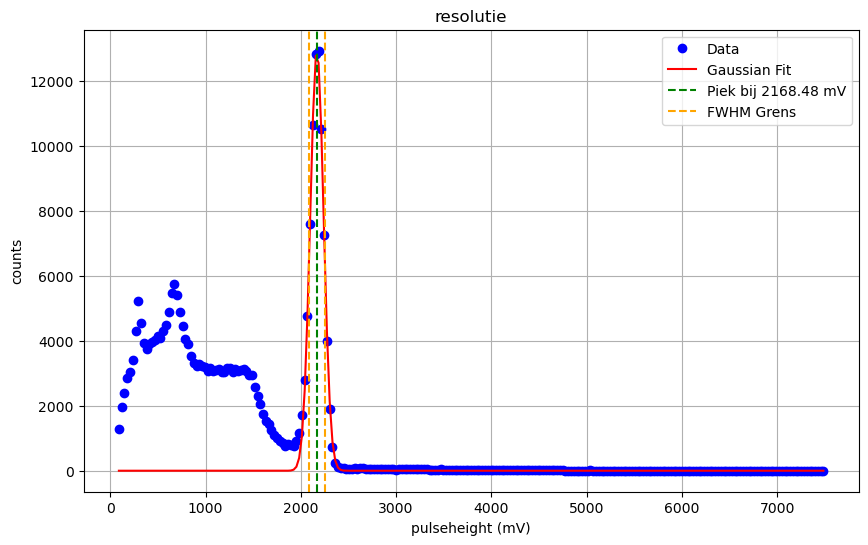

In [41]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit


def gauss_function(x, amp, cen, width):
    return amp * np.exp(-((x - cen) ** 2) / (2 * width ** 2))    


initial_guess = [max(counts_cesium), pulseheight_cesium[np.argmax(counts_cesium)], 100]
params, covariance = curve_fit(gauss_function, pulseheight_cesium, counts_cesium, p0=initial_guess)


amp, cen, width = params
fwhm = 2 * np.sqrt(2 * np.log(2)) * width  
resolution = (fwhm / cen) * 100  


print(f"Fitted Parameters:")
print(f"Amplitude: {amp:.2f}")
print(f"Center (Pulse hoogte op de piek): {cen:.2f} mV")
print(f"Width (sigma): {width:.2f} mV")
print(f"FWHM: {fwhm:.2f} mV")
print(f"Resolutie: {resolution:.2f}%")


plt.figure(figsize=(10, 6))
plt.plot(pulseheight_cesium, counts_cesium, label='Data', color='blue', marker='o', linestyle='')
plt.plot(
    pulseheight_cesium,
    gauss_function(pulseheight_cesium, *params),
    label='Gaussian Fit',
    color='red',
    linestyle='-',
)
plt.axvline(cen, color='green', linestyle='--', label=f'Piek bij {cen:.2f} mV')
plt.axvline(cen - fwhm / 2, color='orange', linestyle='--', label='FWHM Grens')
plt.axvline(cen + fwhm / 2, color='orange', linestyle='--')
plt.xlabel('pulseheight (mV)')
plt.ylabel('counts')
plt.title('resolutie')
plt.legend()
plt.grid()
plt.show()


In [ ]:

input_file = 'spectrum_cesium_new'
output_file = 'spectrum_cesium_new.csv'

with open(input_file, 'r') as infile, open(output_file, 'w') as outfile:
    for line in infile:
        values = line.strip().split()
        outfile.write(','.join(values) + '\n')

